<a href="https://colab.research.google.com/github/tutsilianna/Tools_and_Methods_of_math_tech/blob/main/lab3/%D0%98%D0%B8%D0%9C%D0%9C%D0%A2_%D0%9B%D0%A0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №3**


---


**Команда №2:**

*Давыдова Кристина Сергеевна*        
*Поздышева Татьяна Сергеевна*

---



**"Численные методы решения СЛАУ"**

*Цель лабораторной работы*: реализовать методы LU-разложения и итерационные методы для решения СЛАУ численно, а также сравнить их эффективность.


1. Реализовать алгоритм LU-разложения матрицы, а также метод решения СЛАУ с использованием LU-разложения.

2. Реализовать итерационный метод решения СЛАУ (метод Зейделя, Якоби или верхней релаксации на выбор).

3. Провести исследование реализованных методов на системах с матрицами $A$, число обусловленности которых регулируется за счет изменения диагонального преобладания. Внедиагональные элементы матрицы $A$ выбираются случайным образом из множества $a_{ij} ∈ {0, −1, −2, −3, −4}$, а диагональные элементы определяются из условия
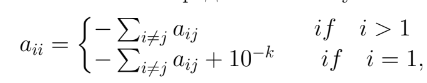

где сумма вычисляется только по строке.

Для исследования работы методов рекомендуется решать СЛАУ вида:

$Ax = F$

где для определения правой части $F$ рассматривается вектор $x =
(1, 2, . . . , n)^T$, что позволяет в дальнейшем сравнивать точное и приближенное решение.

4. Оценить зависимость числа обусловленности и точности полученного решения в зависимости от параметра $k$.

5. Провести аналогичные исследования на матрицах Гильберта, которые строятся согласно формуле

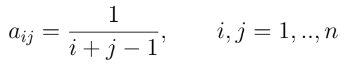

где $n$ - размерность матрицы.

6. Сравнить между собой прямые и итерационные методы по эффективности методов в зависимости от размеров n матрицы:

$n = 2^m, m = 1, .., 9$

##Реализован алгоритм LU-разложения матрицы и метод решения СЛАУ с использованием LU-разложения

**$LU$ -разложение** — это представление матрицы $A$ в виде $A = L \cdot U$, где $L$ — нижнетреугольная матрица с еденичной диагональю, а $U$ — верхнетреугольная матрица. Данное разложение может быть применено только к невырожденной матрице, поэтому далее будем считать что матрица $A$ невырождена.


Если известно LU-разложение матрицы $A$, $A$ =$ L\cdot U$, исходная система может быть записана как $LUx=b.$

Эта система может быть решена в два шага.

1. На первом шаге решается система $Ly=b.$ Поскольку $L$ — нижняя треугольная матрица, эта система решается непосредственно прямой подстановкой.
2. На втором шаге решается система $Ux=y$. Поскольку $U$ — верхняя треугольная матрица, эта система решается непосредственно обратной подстановкой.

Программа начинает с импорта необходимых модулей, включая `numpy` для работы с матрицами и векторами.

In [ ]:
import numpy as np
import time
from sympy import symbols, Matrix, pprint

Затем определяются функции `lu_decomposition()` и `solve_lu()` для выполнения LU-разложения и решения СЛАУ.

In [ ]:
def lu_decomposition(matrix):
    n = len(matrix)
    L = np.eye(n)
    U = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i <= j:
                U[i][j] = matrix[i][j] - sum(L[i][k]*U[k][j] for k in range(i))
            elif i > j:
                L[i][j] = (matrix[i][j] - sum(L[i][k]*U[k][j] for k in range(i))) / U[j][j]
    return L, U

In [ ]:
def solve_lu(L, U, b):
    n = len(L)
    y = np.zeros(n)
    x = np.zeros(n)

    # прямая подстановка (Ly = b)
    for i in range(n):
        y[i] = b[i] - sum(L[i][j] * y[j] for j in range(i))

    # обратная подстановка (Ux = y)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i + 1, n))) / U[i][i]

    return x

формулы [здесь](https://infofaq.ru/reshenie-slau-metodom-lu-razlozheniy.html)

В основной части программы генерируется случайная матрица `A` и вектор `b`.

In [ ]:
n = 3
A = np.random.rand(n, n)
b = np.random.rand(n)

Далее выполняется LU-разложение, затем вызывается функция `solve_lu()`, которая решает СЛАУ с использованием LU-разложения.

In [ ]:
L, U = lu_decomposition(A)
x = solve_lu(L, U, b)

Полученные матрицы L и U выводятся на экран и решение `x` выводится на экран.

In [ ]:
print("Матрица A:\n")
pprint(Matrix(A))

print("\nВектор b:\n")
pprint(Matrix(b))

print('\nL:\n')
pprint(Matrix(L))

print('\nU:\n')
pprint(Matrix(U))

print("\nРешение x:\n")
pprint(Matrix(x))

Матрица A:

⎡0.54513461607837   0.503000895876319  0.26646612574203 ⎤
⎢                                                       ⎥
⎢0.569533540464508  0.897068685992642  0.270444030938739⎥
⎢                                                       ⎥
⎣0.799065532115182  0.764177088738253  0.445546894960659⎦

Вектор b:

⎡0.470348377075728⎤
⎢                 ⎥
⎢0.127251678068551⎥
⎢                 ⎥
⎣0.115939723222491⎦

L:

⎡      1.0                 0            0 ⎤
⎢                                         ⎥
⎢1.04475761337935         1.0           0 ⎥
⎢                                         ⎥
⎣1.4658132295167   0.0723223881659477  1.0⎦

U:

⎡0.54513461607837  0.503000895876319   0.26646612574203  ⎤
⎢                                                        ⎥
⎢       0          0.371554670489222  -0.0079484826379469⎥
⎢                                                        ⎥
⎣       0                  0           0.055532175876603 ⎦

Решение x:

⎡6.77792009684407 ⎤
⎢                 ⎥
⎢-1.1908

##Реализован метод Зейделя и Якоби для решения СЛАУ, используя ранее сгенерированные случайные матрицы `A` и вектор `b`

Для решения СЛАУ методом Зейдаля, нужно сначала разложить матрицу `A` на сумму трех матриц:

`A = D + L + U`

Где `D` - диагональная матрица, `L` - нижнетреугольная матрица, `U `- верхнетреугольная матрица.

Определена функция `zeidel_iteration`, которая решает СЛАУ методом Зейделя. Функция принимает матрицу коэффициентов `A`, вектор правой части `b`, а также параметры `max_iterations` - максимальное количество итераций и `eps` - точность сходимости.

Внутри функции выполняется итерационный процесс с использованием формулы Зейделя. Изначально задается начальное приближение `x` - вектор нулей размерности равной числу неизвестных.

- Сумма `s1`, которая представляет собой скалярное произведение строки `L[i] `матрицы `L` и вектора `x`. Это дает сумму элементов `L[i, j] * x[j]` для всех `j` от `0` до `n-1`, где `L[i, j]` - элемент матрицы `L` на позиции `(i, j)`.

- Сумма `s2`, которая представляет собой скалярное произведение строки `U[i]` матрицы `U` и вектора `x_prev.` Это дает сумму элементов `U[i, j] * x_prev[j]` для всех `j` от `0` до `n-1`, где `U[i, j]` - элемент матрицы U на позиции `(i, j)`.

- Вычисляется новое значение `x[i] - i-й` компоненты вектора `x`. Оно равно `(b[i] - s1 - s2) / A[i, i]`, где `b[i] - i-й` элемент вектора `b`, `A[i, i]` - элемент матрицы A на позиции `(i, i)`.

Далее, в цикле выполняются итерации до тех пор, пока не будет достигнута максимальное количество итераций или пока не будет достигнута заданная точность сходимости. На каждой итерации сохраняется предыдущее приближение, вычисляется новое приближение `x` по формуле Зейделя.

Внутри цикла также проверяется условие сходимости - разность между текущим и предыдущим приближением должна быть меньше заданной точности `eps`. Если условие сходимости выполнено, цикл прерывается.


In [ ]:
def zeidel_iteration(A, b, max_iterations=1000, eps=1e-8):
    n = len(A)
    x = np.zeros(n)  # начальное приближение

    D = np.diag(np.diag(A))# Матрица D - диагональная матрица, содержащая только диагональные элементы матрицы A
    L = np.tril(A, -1)# Матрица L - нижняя треугольная матрица, содержащая элементы: L[i,j] = A[i,j], i > j
    U = np.triu(A, 1) # Матрица U - верхняя треугольная матрица, содержащая элементы: U[i,j] = A[i,j], i < j

    iteration_count = 0
    while iteration_count < max_iterations:
        x_prev = x.copy()  # сохраняем предыдущее приближение
        for i in range(n):
            s1 = np.dot(L[i], x)
            s2 = np.dot(U[i], x_prev)
            x[i] = (b[i] - s1 - s2) / A[i, i]
        if np.linalg.norm(x - x_prev) < eps:  # проверка условия сходимости
            break
        iteration_count += 1

    return x, iteration_count  # Возвращаем решение x, количество проведенных итераций

In [ ]:
solution, iteration = zeidel_iteration(A, b)

print("Решение СЛАУ методом Зейдаля:\n")
pprint(Matrix(solution))
print("\nКоличество проведенных итераций:", iteration)

Решение СЛАУ методом Зейдаля:

⎡0.0408595024068766⎤
⎢                  ⎥
⎢0.743944564961388 ⎥
⎢                  ⎥
⎣0.0954415913899389⎦

Количество проведенных итераций: 27


In [ ]:
import copy
import math

def isNeedToComplete(x_old, x_new):
    eps = 0.0001
    sum_up = 0
    sum_low = 0
    for k in range(0, len(x_old)):
        sum_up += ( x_new[k] - x_old[k] ) ** 2
        sum_low += ( x_new[k] ) ** 2

    return math.sqrt( sum_up / sum_low ) < eps

def Jacobi_method(A, b, x0, max_iter=1000, eps=0.000001):
    flag = True
    count_iter = 1

    while flag and count_iter < max_iter:
        if count_iter == 1:
            x_prev = copy.deepcopy(x0)
        else:
            x_prev = copy.deepcopy(x)

        #x = [b[i]/A[i][i] - sum(A[i][j]*x_pred[j]/A[i][i] for j in range(1, i)) - sum(A[i][j]*x_pred[j]/A[i][i] for j in range(i+1, len(b))) for i in range(len(b))]
        x = []
        for i in range(len(b)):
            sum_ = 0
            for j in range(1, len(b)):
                if i != j:
                    sum_ += A[i][j]*x_prev[j]/A[i][i]
            x.append(b[i]/A[i][i] - sum_)
        count_iter += 1

        if math.fabs(np.linalg.norm(np.array(x) - np.array(x_prev))) < eps:
            flag = False

    return x, count_iter

In [ ]:
x_jacobi, num_iter_j = Jacobi_method(A, b, x0=[1 for i in range(len(b))])

print("Решение x (метод Якоби):\n")
pprint(Matrix(x_jacobi))
print("\nКоличество итераций:", num_iter_j)

Решение x (метод Якоби):

⎡-54.270848654289 ⎤
⎢                 ⎥
⎢ 8.3219810495801 ⎥
⎢                 ⎥
⎣-3.39111123126549⎦

Количество итераций: 107


In [ ]:
A_ = [[10, 1, -1],
     [1, 10, -1],
     [-1, 1, 10]]

b_ = [11, 10, 10]

x_jacobi_, num_iter_j_ = Jacobi_method(A_, b_, x0=[1,1,1])

print("Решение x (метод Якоби):\n")
pprint(Matrix(x_jacobi_))
print("\nКоличество итераций:", num_iter_j_)
print("\nТочное решение:\n")
pprint(Matrix([1, 1, 1]))

Решение x (метод Якоби):

⎡1.080198 ⎤
⎢         ⎥
⎢1.0891089⎥
⎢         ⎥
⎣0.8910891⎦

Количество итераций: 8

Точное решение:

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦


##Исследование методов LU-разложения, метода Зейделя, метода Якоби на системах с матрицами `A`, где число обусловленности регулируется путем изменения диагонального преобладания.

Приведенный код создает матрицу A размером n x n, где n - заданное число, и число обусловленности контролируется переменной k. Затем он решает систему линейных уравнений Ax = F с использованием функции `np.linalg.solve()`. Результат выводится в виде вектора x.

1. Определяем функцию `generate_matrix(n, k)`, которая генерирует матрицу `A` размером `n x n` с внедиагональными элементами, выбранными случайным образом из интервала от -4 до 0.

2. В цикле проходим по строкам матрицы `A` и указываем значения для диагональных элементов в соответствии с заданными условиями. Если строка равна 1, то диагональный элемент равен отрицательной сумме внедиагональных элементов плюс 10 в степени равной минус `k`. В остальных случаях диагональный элемент равен отрицательной сумме внедиагональных элементов.

3. В функции `solve_system(A)` решаем систему линейных уравнений с использованием функции `np.linalg.solve()`. Матрица `A` и правая часть системы `F` задаются соответствующими параметрами.


In [ ]:
def generate_matrix(n, k):
    A1 = np.random.uniform(-4, 0, (n, n))

    for i in range(n):
        if i == 0:
            A1[i, i] = -np.sum(A1[i, :]) + 10**(-k)
        else:
            A1[i, i] = -np.sum(A1[i, :])

    return A1

def solve_system(A1, F):
    n = A1.shape[0]
    x_t = np.arange(1, n+1)
    F = np.transpose(x_t)

    return np.linalg.solve(A1, F)

In [ ]:
k = 3
A1 = generate_matrix(n, k)
x_t = solve_system(A1, F)
F = np.arange(1, n+1)

print("Новая матрица А:\n")
pprint(Matrix(A1))
print("\nПравая часть - Вектор F:\n")
pprint(Matrix(F))
print("\nРешение СЛАУ:\n")
pprint(Matrix(x_t))

Новая матрица А:

⎡ 3.38848730885029   -0.673471376430906  -2.03444003446313⎤
⎢                                                         ⎥
⎢-0.476345825527004   4.97789416304304   -2.3048744719066 ⎥
⎢                                                         ⎥
⎣-2.08304947941584   -0.195321596440948  4.96447924340019 ⎦

Правая часть - Вектор F:

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

Решение СЛАУ:

⎡1.19037402898179⎤
⎢                ⎥
⎢1.0458038364528 ⎥
⎢                ⎥
⎣1.14490882076642⎦


In [ ]:
print('\nL:\n')
pprint(Matrix(L))

print('\nU:\n')
pprint(Matrix(U))

print("\nРешение x:\n")
pprint(Matrix(x))

solution, iteration = zeidel_iteration(A1, F)
print("\nРешение СЛАУ методом Зейдаля:\n")
pprint(Matrix(solution))
print("\nКоличество проведенных итераций:", iteration)

x_jacobi, num_iter_j = Jacobi_method(A1, F, x0=[1 for i in range(len(F))])
print("\nРешение x (метод Якоби):\n")
pprint(Matrix(x_jacobi))
print("\nКоличество итераций:", num_iter_j)


L:

⎡      1.0                 0            0 ⎤
⎢                                         ⎥
⎢1.04475761337935         1.0           0 ⎥
⎢                                         ⎥
⎣1.4658132295167   0.0723223881659477  1.0⎦

U:

⎡0.54513461607837  0.503000895876319   0.26646612574203  ⎤
⎢                                                        ⎥
⎢       0          0.371554670489222  -0.0079484826379469⎥
⎢                                                        ⎥
⎣       0                  0           0.055532175876603 ⎦

Решение x:

⎡6.77792009684407 ⎤
⎢                 ⎥
⎢-1.19085030278667⎥
⎢                 ⎥
⎣-9.85315381555392⎦

Решение СЛАУ методом Зейдаля:

⎡ -4.0141849307989 ⎤
⎢                  ⎥
⎢-0.502763810566452⎥
⎢                  ⎥
⎣ 1.09257243825587 ⎦

Количество проведенных итераций: 28

Решение x (метод Якоби):

⎡-2.3346335882598⎤
⎢                ⎥
⎢1.51422497776241⎥
⎢                ⎥
⎣3.14474270375071⎦

Количество итераций: 15


## Зависимость числа обусловленности и точности полученного решения в зависимости от параметра k

Для оценки зависимости числа обусловленности и точности полученного решения в зависимости от параметра k, можно изменять параметр k при генерации матрицы A1 и решать систему уравнений для каждого значения k. Затем можно вычислить число обусловленности матрицы A1 и сравнить полученное решение с точным решением.

In [ ]:
def compute_error(x, x_exact):
    return np.linalg.norm(x - x_exact)

n = 3
k_values = [1, 2, 3, 4, 5]

for k in k_values:
    A1 = generate_matrix(n, k)
    F = np.arange(1, n+1)

    x_exact = solve_system(A1, F)
    x_computed = np.linalg.solve(A1, F)
    error = compute_error(x_computed, x_exact)
    condition_number = np.linalg.cond(A1)

    print(f"Параметр k: {k}")
    print("Матрица A1:\n")
    pprint(Matrix(A1))
    print("\nПравая часть - Вектор F:\n")
    pprint(Matrix(F))
    print("\nТочное решение:\n")
    pprint(Matrix(x_exact))
    print("\nВычисленное решение:\n")
    pprint(Matrix(x_computed))
    print("\nПогрешность:\n", error)
    print("Число обусловленности матрицы A1:\n", condition_number)
    print("-------------------------------------------------------------")

Параметр k: 1
Матрица A1:

⎡ 8.62213757642557   -3.94710459010589  -3.73877677778112⎤
⎢                                                        ⎥
⎢-0.115012570132747  7.59437428224571   -3.96824814794766⎥
⎢                                                        ⎥
⎣-3.71279087058466   -2.05604496670508  6.63803896504686 ⎦

Правая часть - Вектор F:

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

Точное решение:

⎡1.23044515650314⎤
⎢                ⎥
⎢1.04723579374282⎥
⎢                ⎥
⎣1.46452129577544⎦

Вычисленное решение:

⎡1.23044515650314⎤
⎢                ⎥
⎢1.04723579374282⎥
⎢                ⎥
⎣1.46452129577544⎦

Погрешность:
 0.0
Число обусловленности матрицы A1:
 6.9583941843207135
-------------------------------------------------------------
Параметр k: 2
Матрица A1:

⎡8.61495806105425   -3.74460099804968  -2.24229171708051⎤
⎢                                                       ⎥
⎢-2.03293593563226  3.86831554487291   -1.0016580642906 ⎥
⎢                                                       ⎥
⎣-3.80

Генерация матрицы Гильберта

In [ ]:
def generate_hilbert_matrix(n):
    A = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            A[i-1][j-1] = 1 / (i + j - 1)
    return A

In [ ]:
H = generate_hilbert_matrix(n)
b = np.random.rand(n)

L, U = lu_decomposition(H)
x_lu = solve_lu(L, U, b)

solution, iteration = zeidel_iteration(H, b)
x_jacobi, num_iter_j = Jacobi_method(H, b, x0=np.zeros(n))

print("Hilbert матрица H:\n")
pprint(Matrix(H))

print("\nВектор b:\n")
pprint(Matrix(b.T))

print('\nL:\n')
pprint(Matrix(L))

print('\nU:\n')
pprint(Matrix(U))

print("\nРешение x с помощью LU-метода:\n")
pprint(Matrix(x_lu))

print("\nРешение СЛАУ методом Зейделя:\n")
pprint(Matrix(solution))
print("\nКоличество проведенных итераций:", iteration)

print("\nРешение x (метод Якоби):\n")
pprint(Matrix(x_jacobi))
print("\nКоличество итераций:", num_iter_j)

Hilbert матрица H:

⎡       1.0                0.5         0.333333333333333⎤
⎢                                                       ⎥
⎢       0.5         0.333333333333333        0.25       ⎥
⎢                                                       ⎥
⎣0.333333333333333        0.25                0.2       ⎦

Вектор b:

⎡0.868143284817093⎤
⎢                 ⎥
⎢0.397575810857148⎥
⎢                 ⎥
⎣0.549240083159556⎦

L:

⎡       1.0          0    0 ⎤
⎢                           ⎥
⎢       0.5         1.0   0 ⎥
⎢                           ⎥
⎣0.333333333333333  1.0  1.0⎦

U:

⎡1.0         0.5           0.333333333333333 ⎤
⎢                                            ⎥
⎢ 0   0.0833333333333333  0.0833333333333333 ⎥
⎢                                            ⎥
⎣ 0           0           0.00555555555555554⎦

Решение x с помощью LU-метода:

⎡9.97776286728324 ⎤
⎢                 ⎥
⎢-53.7818175375633⎥
⎢                 ⎥
⎣53.3438675589465 ⎦

Решение СЛАУ методом Зейделя:

⎡9.97776279479987 

исследование

In [ ]:
k_values = [1, 2, 3, 4, 5]

for k in k_values:
    H = generate_matrix(n, k)
    F = np.arange(1, n+1)

    x_exact = solve_system(H, F)
    x_computed = np.linalg.solve(H, F)
    error = compute_error(x_computed, x_exact)
    condition_number = np.linalg.cond(H)

    print(f"Параметр k: {k}")
    print("Матрица H:\n")
    pprint(Matrix(H))
    print("\nПравая часть - Вектор F:\n")
    pprint(Matrix(F))
    print("\nТочное решение:\n")
    pprint(Matrix(x_exact))
    print("\nВычисленное решение:\n")
    pprint(Matrix(x_computed))
    print("\nПогрешность:\n", error)
    print("Число обусловленности матрицы H:\n", condition_number)
    print("-------------------------------------------------------------")

Параметр k: 1
Матрица H:

⎡7.48694177184012   -2.05598559699659  -3.00724749643271 ⎤
⎢                                                        ⎥
⎢-1.84566216872439  4.27437021413379   -0.834329545533384⎥
⎢                                                        ⎥
⎣-3.78321774000506  -2.33058980820877   9.82915795340954 ⎦

Правая часть - Вектор F:

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

Точное решение:

⎡0.710086927088223⎤
⎢                 ⎥
⎢0.930509389740915⎥
⎢                 ⎥
⎣0.799157892966184⎦

Вычисленное решение:

⎡0.710086927088223⎤
⎢                 ⎥
⎢0.930509389740915⎥
⎢                 ⎥
⎣0.799157892966184⎦

Погрешность:
 0.0
Число обусловленности матрицы H:
 5.609318778642621
-------------------------------------------------------------
Параметр k: 2
Матрица H:

⎡ 8.32593265991934   -3.94084847405347  -3.40395563157292⎤
⎢                                                        ⎥
⎢-0.680256009443698  4.88338492709394   -3.13232926680663⎥
⎢                                                      